In [ ]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline
import torch
import pandas as pd
from collections import Counter
from tqdm.auto import tqdm
import warnings


warnings.filterwarnings("ignore")
tqdm.pandas()

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("monilouise/ner_pt_br")
model = AutoModelForTokenClassification.from_pretrained("monilouise/ner_pt_br")

nlp = pipeline("ner", model=model, tokenizer=tokenizer)

df = pd.read_csv('articles.csv', on_bad_lines='skip', engine='python')
df.date = pd.to_datetime(df.date)
df.head()

Some weights of the model checkpoint at monilouise/ner_pt_br were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


,title,text,date,category,subcategory,link
0,"Lula diz que está 'lascado', mas que ainda tem...",Com a possibilidade de uma condenação impedir ...,2017-09-10,poder,NaN,http://www1.folha.uol.com.br/poder/2017/10/192...
1,"'Decidi ser escrava das mulheres que sofrem', ...","Para Oumou Sangaré, cantora e ativista malines...",2017-09-10,ilustrada,NaN,http://www1.folha.uol.com.br/ilustrada/2017/10...
2,Três reportagens da Folha ganham Prêmio Petrob...,Três reportagens da Folha foram vencedoras do ...,2017-09-10,poder,NaN,http://www1.folha.uol.com.br/poder/2017/10/192...
3,Filme 'Star Wars: Os Últimos Jedi' ganha trail...,A Disney divulgou na noite desta segunda-feira...,2017-09-10,ilustrada,NaN,http://www1.folha.uol.com.br/ilustrada/2017/10...
4,CBSS inicia acordos com fintechs e quer 30% do...,"O CBSS, banco da holding Elopar dos sócios Bra...",2017-09-10,mercado,NaN,http://www1.folha.uol.com.br/mercado/2017/10/1...


In [ ]:
df['date'] = pd.to_datetime(df['date'])
df_mercado = df[(df['category'] == 'mercado') & (df['date'].dt.year == 2015) & (df['date'].dt.month.isin([1, 2, 3]))]


In [ ]:
def extrair_entidades(text):
    entities = model(text)
    return [entity for entity in entities if "ORG" in entity['entity_group']]

In [ ]:
model = pipeline("ner", model='monilouise/ner_pt_br', grouped_entities=True)

df_mercado['entities'] = df_mercado['text'].progress_apply(extrair_entidades)

Some weights of the model checkpoint at monilouise/ner_pt_br were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 0/2111 [00:00<?, ?it/s]

In [76]:
df_mercado['entities'] = df_mercado['text'].progress_apply(extract_entities)

  0%|          | 0/2111 [00:00<?, ?it/s]

In [85]:
counter = Counter()
for entities in df_mercado['entities']:
    for entity in entities:
        counter[entity['word']] += 1

In [86]:
ranking = pd.DataFrame(counter.items(), columns=['Organizacao', 'Total'])
ranking = ranking.sort_values(by='Total', ascending=False)
top_10 = ranking.head(10)


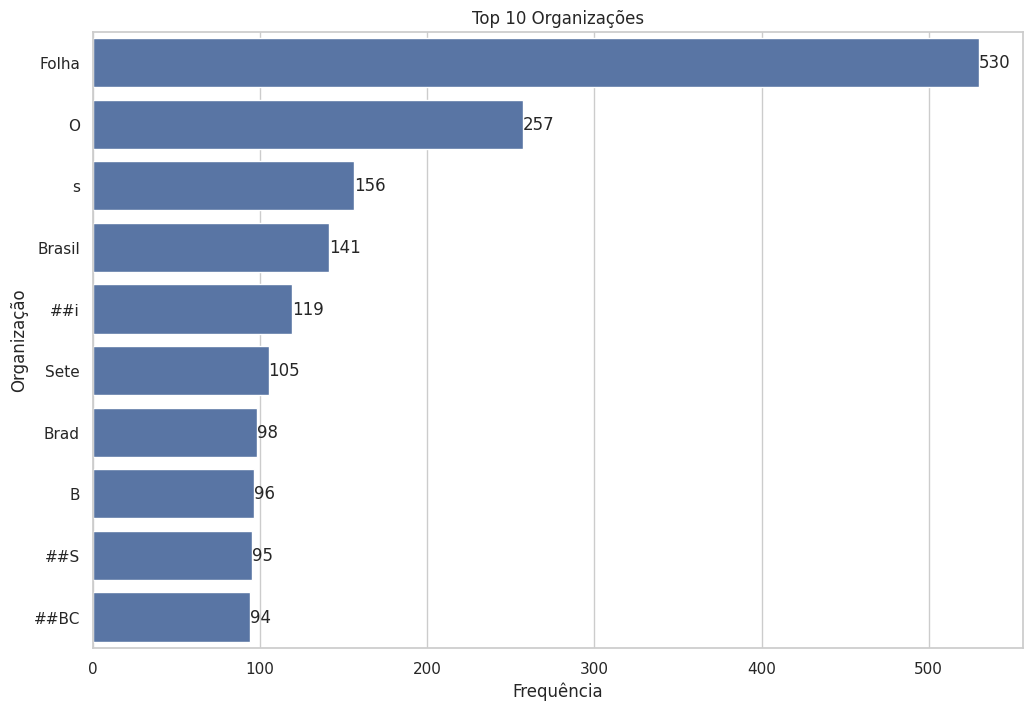

In [89]:

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Total', y='Organizacao', data=top_10)
plt.title('Top 10 Organizações')
plt.xlabel('Frequência')
plt.ylabel('Organização')
for container in ax.containers:
    ax.bar_label(container)
plt.show()